In [1]:
# Importar las librerías a utilizar
import pandas as pd
from datetime import datetime
import numpy as np

In [23]:
# Cargar el .csv
df_accidentes = pd.read_csv("accidentes.csv")
df_accidentes.head()

,id,n_victimas,fecha,aaaa,mm,dd,hora,franja_hora,direccion,tipo_calle,...,rol,vehiculo_victima,sexo,edad,gravedad,moto,auto,transporte_publico,camion,ciclista
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00,5e-324,0.0,0.0,0.0,0.0
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00,5e-324,0.0,0.0,0.0,0.0
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00,5e-324,0.0,0.0,0.0,0.0
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,CONDUCTOR,MOTO,MASCULINO,18,SD,5e-324,0.0,0.0,0.0,0.0
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00,5e-324,0.0,0.0,0.0,0.0


# Fecha y Hora

Voy a conservar una columna con la fecha y una con la franja horaria.

In [24]:
# Revisar la columna de franja_horaria
df_accidentes["franja_hora"].describe()

count     28310
unique       26
top          17
freq       2032
Name: franja_hora, dtype: object

In [25]:
# Revisar la distribución de franja_horaria
df_accidentes["franja_hora"].value_counts()

franja_hora
17    2032
16    2006
14    1894
13    1857
12    1823
15    1811
18    1808
19    1562
11    1484
20    1360
9     1327
10    1300
8     1265
21    1158
0      946
22     920
7      878
23     700
6      565
1      445
5      386
2      293
4      253
3      233
sd       3
SD       1
Name: count, dtype: int64

In [26]:
# Cuento los nulos
df_accidentes["franja_hora"].isnull().sum()

5

Tengo 4 valores "sin datos" y 5 nulos, voy a asignar los nulos a las 17 (5) los sd a las 16(3) y los SD a las 14 (1)

In [27]:
df_accidentes["franja_hora"].replace('sd', "16", inplace=True)
df_accidentes["franja_hora"].replace('SD', "14", inplace=True)
df_accidentes["franja_hora"].fillna("17", inplace=True)
df_accidentes["franja_hora"].describe()

count     28315
unique       24
top          17
freq       2037
Name: franja_hora, dtype: object

In [28]:
# Convertir la columna de franja_horaria a entero
df_accidentes["franja_hora"] = df_accidentes["franja_hora"].astype(np.int8)
df_accidentes["franja_hora"].describe()

count    28315.000000
mean        13.496733
std          5.634942
min          0.000000
25%         10.000000
50%         14.000000
75%         18.000000
max         23.000000
Name: franja_hora, dtype: float64

In [29]:
# Revisar la columna fecha
df_accidentes["fecha"].describe()

count                   28315
unique                   1695
top       2021-12-17 00:00:00
freq                       79
Name: fecha, dtype: object

In [30]:
# Contar los nulos
df_accidentes["fecha"].isnull().sum()

0

In [31]:
# Pasar a fecha los valores de la columna fecha
df_accidentes["fecha"] = pd.to_datetime(df_accidentes["fecha"], format='mixed')

In [32]:
# Normalizar los valores al formato que me agrade
df_accidentes["fecha"] = df_accidentes["fecha"].dt.strftime("%Y-%m-%d")

In [33]:
df_accidentes["fecha"].describe()

count          28315
unique          1446
top       2021-12-17
freq              79
Name: fecha, dtype: object

In [34]:
# Revisar la columna fecha
df_accidentes["fecha"].info

<bound method Series.info of 0        2016-01-01
1        2016-01-02
2        2016-01-03
3        2016-01-10
4        2016-01-21
            ...    
28310    2021-12-31
28311    2021-12-31
28312    2021-12-31
28313    2021-12-31
28314    2020-05-17
Name: fecha, Length: 28315, dtype: object>

Por último voy a borrar las columnas con la fecha dividida y con la hora.

In [35]:
df_accidentes.columns

Index(['id', 'n_victimas', 'fecha', 'aaaa', 'mm', 'dd', 'hora', 'franja_hora',
       'direccion', 'tipo_calle', 'calle', 'altura', 'cruce',
       'direccion_normalizada', 'comuna', 'geocodificacion_CABA', 'longitud',
       'latitud', 'participantes', 'victima', 'acusado', 'rol',
       'vehiculo_victima', 'sexo', 'edad', 'gravedad', 'moto', 'auto',
       'transporte_publico', 'camion', 'ciclista'],
      dtype='object')

In [36]:
# Eliminar las columnas que ya no se necesitan
columnas_eliminar = ["aaaa", "mm", "dd", "hora"]
df_accidentes.drop(columnas_eliminar, axis=1, inplace=True)

In [37]:
df_accidentes.columns

Index(['id', 'n_victimas', 'fecha', 'franja_hora', 'direccion', 'tipo_calle',
       'calle', 'altura', 'cruce', 'direccion_normalizada', 'comuna',
       'geocodificacion_CABA', 'longitud', 'latitud', 'participantes',
       'victima', 'acusado', 'rol', 'vehiculo_victima', 'sexo', 'edad',
       'gravedad', 'moto', 'auto', 'transporte_publico', 'camion', 'ciclista'],
      dtype='object')

In [38]:
# Guardar el csv parcial
df_accidentes.to_csv("accidentes_parcial.csv", index=False)

# Número de Víctimas

In [99]:
# Cargar el csv
df_accidentes = pd.read_csv("accidentes_parcial.csv")

In [39]:
# Revisar la columna n_victimas
df_accidentes["n_victimas"].describe()

count    28315.000000
mean         1.413350
std          1.076277
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: n_victimas, dtype: float64

In [40]:
# Contar los valores distintos de n_victimas
df_accidentes["n_victimas"].value_counts()

n_victimas
1     21707
2      4286
3      1200
4       472
5       330
6       126
8        80
7        42
10       40
16       32
Name: count, dtype: int64

In [41]:
# Contar los valores distintos de id
df_accidentes["id"].value_counts()

id
LC-2019-0291069    16
LC-2019-0188476    16
LC-2021-0137640    10
LC-2019-0049800    10
LC-2019-0428120    10
                   ..
LC-2019-0616801     1
LC-2019-0616592     1
LC-2019-0635165     1
LC-2019-0616529     1
LC-2020-0244615     1
Name: count, Length: 24477, dtype: int64

In [42]:
# Reviso el id puntual para ver que está pasando
df_accidentes[df_accidentes["id"] == "LC-2019-0291069"]

,id,n_victimas,fecha,franja_hora,direccion,tipo_calle,calle,altura,cruce,direccion_normalizada,...,rol,vehiculo_victima,sexo,edad,gravedad,moto,auto,transporte_publico,camion,ciclista
5172,LC-2019-0291069,16,2019-05-10,7,"Goyena, Pedro Av. y Mitre, Emilio 0, Barrio: C...",SD,NaN,NaN,NaN,SD,...,0.0,sd,Varon,SD,SD,SD,SD,x,SD,SD
5173,LC-2019-0291069,16,2019-05-10,7,"Goyena, Pedro Av. y Mitre, Emilio 0, Barrio: C...",SD,NaN,NaN,NaN,SD,...,0.0,sd,Varon,SD,SD,SD,SD,x,SD,SD
5174,LC-2019-0291069,16,2019-05-10,7,"Goyena, Pedro Av. y Mitre, Emilio 0, Barrio: C...",SD,NaN,NaN,NaN,SD,...,0.0,sd,Varon,54,SD,SD,SD,x,SD,SD
5175,LC-2019-0291069,16,2019-05-10,7,"Goyena, Pedro Av. y Mitre, Emilio 0, Barrio: C...",SD,NaN,NaN,NaN,SD,...,0.0,sd,Varon,35,SD,SD,SD,x,SD,SD
5176,LC-2019-0291069,16,2019-05-10,7,"Goyena, Pedro Av. y Mitre, Emilio 0, Barrio: C...",SD,NaN,NaN,NaN,SD,...,0.0,sd,Varon,63,SD,SD,SD,x,SD,SD
5177,LC-2019-0291069,16,2019-05-10,7,"Goyena, Pedro Av. y Mitre, Emilio 0, Barrio: C...",SD,NaN,NaN,NaN,SD,...,0.0,sd,Varon,22,SD,SD,SD,x,SD,SD
5178,LC-2019-0291069,16,2019-05-10,7,"Goyena, Pedro Av. y Mitre, Emilio 0, Barrio: C...",SD,NaN,NaN,NaN,SD,...,0.0,sd,Mujer,22,SD,SD,SD,x,SD,SD
5179,LC-2019-0291069,16,2019-05-10,7,"Goyena, Pedro Av. y Mitre, Emilio 0, Barrio: C...",SD,NaN,NaN,NaN,SD,...,0.0,sd,Mujer,30,SD,SD,SD,x,SD,SD
5180,LC-2019-0291069,16,2019-05-10,7,"Goyena, Pedro Av. y Mitre, Emilio 0, Barrio: C...",SD,NaN,NaN,NaN,SD,...,0.0,sd,Mujer,39,SD,SD,SD,x,SD,SD
5181,LC-2019-0291069,16,2019-05-10,7,"Goyena, Pedro Av. y Mitre, Emilio 0, Barrio: C...",SD,NaN,NaN,NaN,SD,...,0.0,sd,Mujer,SD,SD,SD,SD,x,SD,SD


#### Como realicé la unión de los datos, hay registros duplicados en las columnas con datos globales sobre el accidente. En el caso de la columna del número de víctimas, no necesito una columna que las cuente, ya que si quiero ese dato puedo hacer un agrupamiento por id de accidente y sumar. Por lo que decido eliminarla.

#### En el caso de los otros datos, debo tener presente esto para contar siempre una sola vez para cada id a la hora de hacer análisis.

In [43]:
df_accidentes.drop("n_victimas", axis=1, inplace=True)
df_accidentes.columns

Index(['id', 'fecha', 'franja_hora', 'direccion', 'tipo_calle', 'calle',
       'altura', 'cruce', 'direccion_normalizada', 'comuna',
       'geocodificacion_CABA', 'longitud', 'latitud', 'participantes',
       'victima', 'acusado', 'rol', 'vehiculo_victima', 'sexo', 'edad',
       'gravedad', 'moto', 'auto', 'transporte_publico', 'camion', 'ciclista'],
      dtype='object')

# Dirección / Ubicación Geográfica

In [2]:
# Cargar el csv
df_accidentes = pd.read_csv("accidentes_parcial.csv")

In [44]:
# Revisar que datos hay en la columna de codificación
df_accidentes["geocodificacion_CABA"].head()

0      Point (98896.78238426 93532.43437792)
1      Point (95832.05571093 95505.41641999)
2     Point (106684.29090040 99706.57687843)
3      Point (99840.65224780 94269.16534422)
4    Point (106980.32827929 100752.16915795)
Name: geocodificacion_CABA, dtype: object

In [45]:
# Revisar columnas
df_accidentes.columns

Index(['id', 'fecha', 'franja_hora', 'direccion', 'tipo_calle', 'calle',
       'altura', 'cruce', 'direccion_normalizada', 'comuna',
       'geocodificacion_CABA', 'longitud', 'latitud', 'participantes',
       'victima', 'acusado', 'rol', 'vehiculo_victima', 'sexo', 'edad',
       'gravedad', 'moto', 'auto', 'transporte_publico', 'camion', 'ciclista'],
      dtype='object')

De todas las columnas con información sobre el lugar del hecho, me voy a quedar con "tipo_calle", "direccion_normalizada", "comuna", "latitud" y "longitud".

In [46]:
# Distribución valores distintos
df_accidentes["tipo_calle"].value_counts()

tipo_calle
SD           12879
AVENIDA       8251
CALLE         6323
GRAL PAZ       745
AUTOPISTA      117
Name: count, dtype: int64

In [47]:
# Verificar si hay nulos
df_accidentes["tipo_calle"].isna().sum()

0

tipo_calle está OK

In [48]:
# Revisar direccion_normalizada
df_accidentes["direccion_normalizada"].describe()

count     28253
unique     9261
top          SD
freq      12643
Name: direccion_normalizada, dtype: object

In [49]:
# Revisar si hay nulos
df_accidentes["direccion_normalizada"].isna().sum()

62

In [50]:
# Rellenar los nulos
df_accidentes["direccion_normalizada"].fillna("SD", inplace=True)
df_accidentes["direccion_normalizada"].isna().sum()

0

dirección_normalizada está OK

In [51]:
# Distribución valores distintos
df_accidentes["comuna"].value_counts()

comuna
1                  2931
15                 2237
4                  2213
9                  2150
3                  2003
14                 1840
7                  1817
12                 1750
11                 1645
13                 1590
10                 1568
8                  1420
5                  1400
6                  1104
2                  1021
SD                  936
No Especificada     510
0                     2
Name: count, dtype: int64

In [52]:
# Revisar valores nulos
df_accidentes["comuna"].isna().sum()

178

Voy a juntar los valores "no Especificada", "0" y "nulos", todos en "SD" 

In [53]:
# Llenar los nulos y unificar criterio de valores desconocidos
df_accidentes["comuna"].fillna("SD", inplace=True)
df_accidentes["comuna"].replace("No Especificada", "SD", inplace=True)
df_accidentes["comuna"].replace("0", "SD", inplace=True)

In [54]:
df_accidentes["comuna"].value_counts()

comuna
1     2931
15    2237
4     2213
9     2150
3     2003
14    1840
7     1817
12    1750
11    1645
SD    1626
13    1590
10    1568
8     1420
5     1400
6     1104
2     1021
Name: count, dtype: int64

In [55]:
df_accidentes["comuna"].isna().sum()

0

Comuna está OK

In [56]:
# Revisar latitud
df_accidentes["latitud"].describe()

count     28045
unique    14362
top          SD
freq       1386
Name: latitud, dtype: object

In [57]:
# Verificar si hay nulos
df_accidentes["latitud"].isna().sum()

270

In [58]:
# Rellenar nulos con SD
df_accidentes["latitud"].fillna("SD", inplace=True)
df_accidentes["latitud"].isna().sum()

0

In [59]:
df_accidentes["latitud"].describe()

count     28315
unique    14362
top          SD
freq       1656
Name: latitud, dtype: object

In [60]:
# Revisar longitud
df_accidentes["longitud"].describe()

count     28045
unique    14415
top          SD
freq       1386
Name: longitud, dtype: object

In [61]:
# Verificar si hay nulos
df_accidentes["longitud"].isna().sum()

270

In [62]:
# Rellenar nulos con SD
df_accidentes["longitud"].fillna("SD", inplace=True)
df_accidentes["longitud"].isna().sum()

0

In [63]:
df_accidentes["longitud"].describe()

count     28315
unique    14415
top          SD
freq       1656
Name: longitud, dtype: object

Latitud y Longitud están OK

In [64]:
df_accidentes.columns

Index(['id', 'fecha', 'franja_hora', 'direccion', 'tipo_calle', 'calle',
       'altura', 'cruce', 'direccion_normalizada', 'comuna',
       'geocodificacion_CABA', 'longitud', 'latitud', 'participantes',
       'victima', 'acusado', 'rol', 'vehiculo_victima', 'sexo', 'edad',
       'gravedad', 'moto', 'auto', 'transporte_publico', 'camion', 'ciclista'],
      dtype='object')

In [65]:
# Eliminar las columnas que ya no se necesitan
columnas_eliminar = ["direccion", "calle", "altura", "cruce", "geocodificacion_CABA"]
df_accidentes = df_accidentes.drop(columnas_eliminar,axis=1)
df_accidentes.columns

Index(['id', 'fecha', 'franja_hora', 'tipo_calle', 'direccion_normalizada',
       'comuna', 'longitud', 'latitud', 'participantes', 'victima', 'acusado',
       'rol', 'vehiculo_victima', 'sexo', 'edad', 'gravedad', 'moto', 'auto',
       'transporte_publico', 'camion', 'ciclista'],
      dtype='object')

In [66]:
# Guardar el csv parcial
df_accidentes.to_csv("accidentes_parcial.csv", index=False)

# Rol

In [67]:
# Cargar el csv
df_accidentes = pd.read_csv("accidentes_parcial.csv")

In [67]:
df_accidentes["rol"]

0        CONDUCTOR
1        CONDUCTOR
2        CONDUCTOR
3        CONDUCTOR
4        CONDUCTOR
           ...    
28310       1e-323
28311       1e-323
28312       5e-324
28313       5e-324
28314       5e-324
Name: rol, Length: 28315, dtype: object

In [68]:
df_accidentes["rol"].value_counts()

rol
0.0                     27136
CONDUCTOR                 330
5e-324                    326
PEATON                    267
PASAJERO_ACOMPAÑANTE       80
1e-323                     80
CICLISTA                   29
1.5e-323                   27
2.5e-323                   15
2e-323                     12
SD                         11
1.113730556184e-311         1
1.1137296434825e-311        1
Name: count, dtype: int64

Hay demasiados valores vacíos, y algunos de los valores se repiten con los de otras columnas. No voy a utilizar esta columna para los análisis, así que la voy a eliminar.

In [69]:
df_accidentes = df_accidentes.drop("rol",axis=1)
df_accidentes.columns

Index(['id', 'fecha', 'franja_hora', 'tipo_calle', 'direccion_normalizada',
       'comuna', 'longitud', 'latitud', 'participantes', 'victima', 'acusado',
       'vehiculo_victima', 'sexo', 'edad', 'gravedad', 'moto', 'auto',
       'transporte_publico', 'camion', 'ciclista'],
      dtype='object')

In [70]:
# Guardar el csv parcial
df_accidentes.to_csv("accidentes_parcial.csv", index=False)

# Participantes / Víctima / Acusado / Vehículo víctima / Moto / Auto / Transporte Público / Camión / Ciclista

In [101]:
# Cargar el csv
df_accidentes = pd.read_csv("accidentes_parcial.csv")

En el caso del estudio de las columnas con los vehículos participantes, se fijan algunos criterios previos:
- No se va a analizar la culpabilidad de cada parte, solo se van a considerar las partes intervinientes en el siniestro vial, sin identificar responsabilidades. Por lo tanto la calificación de víctima y acusado no se mantendrá.
- La columna participantes necesita ser desagregada, porque quiero poder analizar los accidentes por vehículos intervinientes de manera individual, y si tengo por ejemplo moto-auto y moto-camión, no me sirve que sean dos datos categóricos independientes. En ambos hubo una moto involucrada y eso es lo que me interesa, lógicamente voy a guardar los datos de los dos participantes del siniestro, pero en columnas separadas.
- Las columnas de vehículo víctima y víctima tienen información casi idéntica.
- Desde uno de los excel vienen columnas diferentes para individualizar los vehículos intervinientes (moto, auto, transporte público, camión, ciclista). Como no se va a trabajar con modelos de machine learning, no considero necesario trabajar los datos de esa forma, aunque si voy a sacar datos de estas columnas, que se ven más completas que las otras.
- Voy a revisar si es posible agrupar las categorías con poca cantidad en "OTRO".  

Como conclusión, voy a dejar dos columnas para las partes intervinientes, llamadas vehiculo_1 y vehiculo_2. Las cuales voy a rellenar con los datos del resto de las columnas de participantes, y en caso de que sean más de dos vehículos voy a sintetizarlo en los dos más relevantes. 

In [71]:
df_accidentes["participantes"]

0                      MOTO-AUTO
1                 AUTO-PASAJEROS
2                      MOTO-AUTO
3                        MOTO-SD
4                 MOTO-PASAJEROS
                  ...           
28310                      SD-SD
28311                      SD-SD
28312                      SD-SD
28313    MOTO-TRANSPORTE PUBLICO
28314                  MOTO-AUTO
Name: participantes, Length: 28315, dtype: object

In [72]:
# Dividir la columna participantes por el guion y almacenar los valores en columnas distintas
df_accidentes["participantes_1"] = df_accidentes["participantes"].str.split('-').str[0]
df_accidentes["participantes_2"] = df_accidentes["participantes"].str.split('-').str[1]
df_accidentes.head()

,id,fecha,franja_hora,tipo_calle,direccion_normalizada,comuna,longitud,latitud,participantes,victima,...,sexo,edad,gravedad,moto,auto,transporte_publico,camion,ciclista,participantes_1,participantes_2
0,2016-0001,2016-01-01,4,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,...,MASCULINO,19,2016-01-01 00:00:00,5e-324,0.0,0.0,0.0,0.0,MOTO,AUTO
1,2016-0002,2016-01-02,1,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,...,MASCULINO,70,2016-01-02 00:00:00,5e-324,0.0,0.0,0.0,0.0,AUTO,PASAJEROS
2,2016-0003,2016-01-03,7,AVENIDA,ENTRE RIOS AV. 2034,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,...,MASCULINO,30,2016-01-03 00:00:00,5e-324,0.0,0.0,0.0,0.0,MOTO,AUTO
3,2016-0004,2016-01-10,0,AVENIDA,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.46503904,-34.68092974,MOTO-SD,MOTO,...,MASCULINO,18,SD,5e-324,0.0,0.0,0.0,0.0,MOTO,SD
4,2016-0005,2016-01-21,5,AVENIDA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,...,MASCULINO,29,2016-02-01 00:00:00,5e-324,0.0,0.0,0.0,0.0,MOTO,PASAJEROS


In [73]:
# Eliminar la columna participantes
df_accidentes.drop("participantes", axis=1, inplace=True)

In [74]:
# Revisar que valores tiene victima
df_accidentes["victima"].head()

0    MOTO
1    AUTO
2    MOTO
3    MOTO
4    MOTO
Name: victima, dtype: object

In [75]:
# Revisar estadísticas de la columna victima
df_accidentes["victima"].describe()

count     28315
unique       19
top          SD
freq      12831
Name: victima, dtype: object

In [76]:
# Distribución de valores únicos
df_accidentes["victima"].value_counts()

victima
SD                    12831
MOTO                   6229
AUTO                   2695
PEATON                 2422
CICLISTA               2263
TRANSPORTE PUBLICO      905
CAMIONETA               257
TAXI                    247
MOVIL                   142
MIXTO                   113
CAMION                   96
BICICLETA                29
MONOPATIN                28
OTRO                     26
UTILITARIO               16
CARGAS                    7
PASAJEROS                 5
OBJETO FIJO               2
PEATON_MOTO               2
Name: count, dtype: int64

In [77]:
# Revisar si hay nulos
df_accidentes["victima"].isna().sum()

0

In [78]:
# Revisar que valores tiene vehiculo_victima
df_accidentes["vehiculo_victima"].head()

0    MOTO
1    AUTO
2    MOTO
3    MOTO
4    MOTO
Name: vehiculo_victima, dtype: object

In [79]:
# Revisar estadísticas de la columna vehiculo_victima
df_accidentes["vehiculo_victima"].describe()

count     28315
unique       17
top          sd
freq      11792
Name: vehiculo_victima, dtype: object

In [80]:
# Distribución de valores únicos
df_accidentes["vehiculo_victima"].value_counts()

vehiculo_victima
sd                    11792
MOTO                   5081
SD                     4486
PEATON                 1951
CICLISTA               1759
AUTO                   1732
TRANSPORTE PUBLICO      680
TAXI                    241
UTILITARIO              231
MOVIL                   134
MIXTO                   113
CAMION                   40
BICICLETA                29
MONOPATIN                27
CARGAS                    7
OTRO                      7
PASAJEROS                 5
Name: count, dtype: int64

In [81]:
# Unificar sd y SD en la columna de vehículo_1
df_accidentes["vehiculo_victima"].replace("sd", "SD", inplace=True)

In [82]:
# Revisar si hay nulos
df_accidentes["vehiculo_victima"].isna().sum()

0

In [83]:
df_accidentes[["victima", "vehiculo_victima"]][df_accidentes["vehiculo_victima"] == "SD"].value_counts()

victima             vehiculo_victima
SD                  SD                  12831
MOTO                SD                   1149
AUTO                SD                    965
CICLISTA            SD                    504
PEATON              SD                    472
TRANSPORTE PUBLICO  SD                    225
CAMION              SD                     56
CAMIONETA           SD                     39
OTRO                SD                     19
MOVIL               SD                      8
TAXI                SD                      6
UTILITARIO          SD                      3
MONOPATIN           SD                      1
Name: count, dtype: int64

En la línea de código anterior veo que la columna victima me puede completar valores de la columna vehiculo_victima

In [84]:
# Revisar los valores de la columna de acusado
df_accidentes["acusado"]

0                      AUTO
1                 PASAJEROS
2                      AUTO
3                        SD
4                 PASAJEROS
                ...        
28310                    SD
28311                    SD
28312                    SD
28313    TRANSPORTE PUBLICO
28314                  AUTO
Name: acusado, Length: 28315, dtype: object

In [85]:
# Revisar si hay nulos 
df_accidentes["acusado"].isna().sum()

0

In [86]:
# Revisar la distribución de valores
df_accidentes["acusado"].value_counts()

acusado
SD                    17941
AUTO                   5376
TRANSPORTE PUBLICO     1188
CAMIONETA               987
MOTO                    807
TAXI                    648
OBJETO FIJO             399
CAMION                  348
PASAJEROS               178
CARGAS                  150
MOVIL                    99
CICLISTA                 90
OTRO                     31
UTILITARIO               29
MULTIPLE                 17
PEATON                   16
BICICLETA                 7
MONOPATIN                 3
TREN                      1
Name: count, dtype: int64

#### Las dos columnas de los vehículos participantes las voy a llenar inicialmente con las columnas de vehículo víctima y la columna de acusado, y luego voy a revisar si puedo completar los valores faltantes con el resto de las columnas.

In [87]:
# Renombrar las columnas
df_accidentes.rename({"vehiculo_victima": "vehiculo_1", "acusado": "vehiculo_2"}, inplace=True, axis=1)
df_accidentes.columns

Index(['id', 'fecha', 'franja_hora', 'tipo_calle', 'direccion_normalizada',
       'comuna', 'longitud', 'latitud', 'victima', 'vehiculo_2', 'vehiculo_1',
       'sexo', 'edad', 'gravedad', 'moto', 'auto', 'transporte_publico',
       'camion', 'ciclista', 'participantes_1', 'participantes_2'],
      dtype='object')

-----------

In [88]:
# Guardar el csv parcial
df_accidentes.to_csv("accidentes_parcial.csv", index=False)

In [109]:
# Cargar el csv
df_accidentes = pd.read_csv("accidentes_parcial.csv")

----------------

Para preparar el relleno de las columnas vehiculo_1 y vehiculo_2. Voy a llenar con nulos todos los valores SD de ambas, y el resto de las columnas las voy a dejar solamente con nulos y con el valor del vehículo cuando existe. También voy a unificar nombre escritos de manera diferente.

In [89]:
# Revisar la distribución
df_accidentes["vehiculo_1"].value_counts()

vehiculo_1
SD                    16278
MOTO                   5081
PEATON                 1951
CICLISTA               1759
AUTO                   1732
TRANSPORTE PUBLICO      680
TAXI                    241
UTILITARIO              231
MOVIL                   134
MIXTO                   113
CAMION                   40
BICICLETA                29
MONOPATIN                27
CARGAS                    7
OTRO                      7
PASAJEROS                 5
Name: count, dtype: int64

In [110]:
# Preparar los valores para los rellenos
df_accidentes["vehiculo_1"].replace('SD', np.NAN, inplace=True)
df_accidentes["vehiculo_1"].replace('CICLISTA', "BICICLETA", inplace=True)

In [91]:
# Revisar la distribución
df_accidentes["vehiculo_2"].value_counts()

vehiculo_2
SD                    17941
AUTO                   5376
TRANSPORTE PUBLICO     1188
CAMIONETA               987
MOTO                    807
TAXI                    648
OBJETO FIJO             399
CAMION                  348
PASAJEROS               178
CARGAS                  150
MOVIL                    99
CICLISTA                 90
OTRO                     31
UTILITARIO               29
MULTIPLE                 17
PEATON                   16
BICICLETA                 7
MONOPATIN                 3
TREN                      1
Name: count, dtype: int64

In [111]:
# Preparar los valores para los rellenos
df_accidentes["vehiculo_2"].replace('SD', np.NAN, inplace=True)
df_accidentes["vehiculo_2"].replace('CICLISTA', "BICICLETA", inplace=True)

In [93]:
# Revisar la distribución
df_accidentes["victima"].value_counts()

victima
SD                    12831
MOTO                   6229
AUTO                   2695
PEATON                 2422
CICLISTA               2263
TRANSPORTE PUBLICO      905
CAMIONETA               257
TAXI                    247
MOVIL                   142
MIXTO                   113
CAMION                   96
BICICLETA                29
MONOPATIN                28
OTRO                     26
UTILITARIO               16
CARGAS                    7
PASAJEROS                 5
OBJETO FIJO               2
PEATON_MOTO               2
Name: count, dtype: int64

In [112]:
# Preparar los valores para los rellenos
df_accidentes["victima"].replace('SD', np.NAN, inplace=True)
df_accidentes["victima"].replace('CICLISTA', "BICICLETA", inplace=True)
df_accidentes["victima"].replace('PEATON_MOTO', "PEATON", inplace=True, limit=1)
df_accidentes["victima"].replace('PEATON_MOTO', "MOTO", inplace=True, limit=1)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9564\907857149.py:4: FutureWarning: The 'limit' keyword in Series.replace is deprecated and will be removed in a future version.
  df_accidentes["victima"].replace('PEATON_MOTO', "PEATON", inplace=True, limit=1)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9564\907857149.py:5: FutureWarning: The 'limit' keyword in Series.replace is deprecated and will be removed in a future version.
  df_accidentes["victima"].replace('PEATON_MOTO', "MOTO", inplace=True, limit=1)


In [113]:
# Revisar la distribución
df_accidentes["participantes_1"].value_counts()

participantes_1
SD                    12831
MOTO                   6221
AUTO                   2694
PEATON                 2417
CICLISTA               2263
TRANSPORTE PUBLICO      905
CAMIONETA               257
TAXI                    247
MOVIL                   142
MIXTO                   113
CAMION                   96
BICICLETA                28
MONOPATIN                28
OTRO                     26
MULTIPLE                 17
UTILITARIO               16
CARGAS                    7
PASAJEROS                 5
PEATON_MOTO               2
Name: count, dtype: int64

In [114]:
# Preparar los valores para los rellenos
df_accidentes["participantes_1"].replace('SD', np.NAN, inplace=True)
df_accidentes["participantes_1"].replace('CICLISTA', "BICICLETA", inplace=True)
df_accidentes["participantes_1"].replace('PEATON_MOTO', "PEATON", inplace=True, limit=1)
df_accidentes["participantes_1"].replace('PEATON_MOTO', "MOTO", inplace=True, limit=1)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9564\389195891.py:4: FutureWarning: The 'limit' keyword in Series.replace is deprecated and will be removed in a future version.
  df_accidentes["participantes_1"].replace('PEATON_MOTO', "PEATON", inplace=True, limit=1)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9564\389195891.py:5: FutureWarning: The 'limit' keyword in Series.replace is deprecated and will be removed in a future version.
  df_accidentes["participantes_1"].replace('PEATON_MOTO', "MOTO", inplace=True, limit=1)


In [115]:
# Revisar la distribución
df_accidentes["participantes_2"].value_counts()

participantes_2
SD                    17941
AUTO                   5374
TRANSPORTE PUBLICO     1188
CAMIONETA               987
MOTO                    807
TAXI                    648
OBJETO FIJO             401
CAMION                  348
PASAJEROS               178
CARGAS                  150
MOVIL                   102
CICLISTA                 90
UTILITARIO               29
OTRO                     28
PEATON                   16
BICICLETA                 7
MONOPATIN                 3
TREN                      1
Name: count, dtype: int64

In [116]:
# Preparar los valores para los rellenos
df_accidentes["participantes_2"].replace('SD', np.NAN, inplace=True)
df_accidentes["participantes_2"].replace('CICLISTA', "BICICLETA", inplace=True)

Sobre las columnas siguientes, no encontré explicación de las marcas, pero infiero que "SD" es "sin datos", que "x" es para marcar en caso afirmativo, y los casos de "0" y "0.0" no sé si son positivos o negativos, pero viendo los casos de transporte público y camiones, infiero que también son casos negativos. Por lo que los únicos positivos son las "x".

In [117]:
# Revisar la distribución
df_accidentes["moto"].value_counts()

moto
SD          10153
x            9978
0            7375
5e-324        676
1e-323         38
1.5e-323        3
Name: count, dtype: int64

In [118]:
# Preparar los valores para los rellenos
df_accidentes["moto"].replace('SD', np.NAN, inplace=True)
df_accidentes["moto"].replace('0', np.NAN, inplace=True)
df_accidentes["moto"].replace('5e-324', np.NAN, inplace=True)
df_accidentes["moto"].replace('1e-323', np.NAN, inplace=True)
df_accidentes["moto"].replace('1.5e-323', np.NAN, inplace=True)
df_accidentes["moto"].replace('x', "MOTO", inplace=True)

In [119]:
# Revisar la distribución
df_accidentes["auto"].value_counts()

auto
SD     14564
x       6525
0       6417
0.0      717
Name: count, dtype: int64

In [120]:
# Preparar los valores para los rellenos
df_accidentes["auto"].replace('SD', np.NAN, inplace=True)
df_accidentes["auto"].replace('0', np.NAN, inplace=True)
df_accidentes["auto"].replace('0.0', np.NAN, inplace=True)
df_accidentes["auto"].replace('x', "AUTO", inplace=True)

In [121]:
# Revisar la distribución
df_accidentes["transporte_publico"].value_counts()

transporte_publico
SD     13539
0      10898
x       3069
0.0      717
Name: count, dtype: int64

In [122]:
# Preparar los valores para los rellenos
df_accidentes["transporte_publico"].replace('SD', np.NAN, inplace=True)
df_accidentes["transporte_publico"].replace('0', np.NAN, inplace=True)
df_accidentes["transporte_publico"].replace('0.0', np.NAN, inplace=True)
df_accidentes["transporte_publico"].replace('x', "TRANSPORTE PUBLICO", inplace=True)

In [123]:
# Revisar la distribución
df_accidentes["camion"].value_counts()

camion
SD     14755
0      11185
x       1566
0.0      717
Name: count, dtype: int64

In [124]:
# Preparar los valores para los rellenos
df_accidentes["camion"].replace('SD', np.NAN, inplace=True)
df_accidentes["camion"].replace('0', np.NAN, inplace=True)
df_accidentes["camion"].replace('0.0', np.NAN, inplace=True)
df_accidentes["camion"].replace('x', "CAMION", inplace=True)

In [125]:
# Revisar la distribución
df_accidentes["ciclista"].value_counts()

ciclista
SD     13392
0      10605
x       3509
0.0      717
Name: count, dtype: int64

In [126]:
# Preparar los valores para los rellenos
df_accidentes["ciclista"].replace('SD', np.NAN, inplace=True)
df_accidentes["ciclista"].replace('0', np.NAN, inplace=True)
df_accidentes["ciclista"].replace('0.0', np.NAN, inplace=True)
df_accidentes["ciclista"].replace('x', "BICICLETA", inplace=True)

----------------

In [127]:
# Guardar el csv parcial
df_accidentes.to_csv("accidentes_parcial.csv", index=False)

In [2]:
# Cargar el csv
df_accidentes = pd.read_csv("accidentes_parcial.csv")

-----------

A partir de los procesos que recibió el dataframe, las columnas "victima" y "participantes_1" se le van a pasar solamente a "vehiculo_1" y la columna "participantes_2" se le va a pasar a "vehiculo_2" Todas las columnas fueron preparadas para tal fin, y no se van a pasar columnas a ambos destinos para evitar que un mismo dato complete las dos columnas de vehiculo. (Ej. Si tengo un accidente entre una moto y un SD, tengo que evitar que se complete moto-moto por error.)

In [128]:
# Contar los nulos para ver la efectividad del relleno
df_accidentes["vehiculo_1"].isna().sum()

16278

In [129]:
# Rellenar usando la columna victima
df_accidentes["vehiculo_1"].fillna(df_accidentes["victima"], inplace=True)
df_accidentes["vehiculo_1"].isna().sum()


12831

In [130]:
# Rellenar usando la columna participantes_1
df_accidentes["vehiculo_1"].fillna(df_accidentes["participantes_1"], inplace=True)
df_accidentes["vehiculo_1"].isna().sum()

12831

In [131]:
# Contar los nulos para ver la efectividad del relleno
df_accidentes["vehiculo_2"].isna().sum()

17941

In [132]:
# Rellenar usando la columna participantes_2
df_accidentes["vehiculo_2"].fillna(df_accidentes["participantes_2"], inplace=True)
df_accidentes["vehiculo_2"].isna().sum()

17941

Las columnas surgidas de dividir la columna de participantes, no aportaron nuevos valores.

En el caso de las columnas de vehículos, como se marcaba con una x el vehículo involucrado, cuando hay solo una x no puedo saber si se trataba de 2 vehículos del mismo tipo, o uno del tipo marcado y uno desconocido, por lo que voy a suponer que la x solo representa un vehículo involucrado, y que si se repetía, la persona llenaba la columna de víctima, acusado o participantes que eran parte del mismo dataset. **Por lo tanto, voy a rellenar los valores de vehiculo_1 siempre que se pueda, y los de vehiculo_2 solo si es diferente al de vehiculo_1.**

In [133]:
df_accidentes.columns

Index(['id', 'fecha', 'franja_hora', 'tipo_calle', 'direccion_normalizada',
       'comuna', 'longitud', 'latitud', 'victima', 'vehiculo_2', 'vehiculo_1',
       'sexo', 'edad', 'gravedad', 'moto', 'auto', 'transporte_publico',
       'camion', 'ciclista', 'participantes_1', 'participantes_2'],
      dtype='object')

In [134]:
# Contar los nulos para ver la efectividad del relleno
df_accidentes["vehiculo_1"].isna().sum()

12831

In [135]:
# Rellenar usando la columna moto
df_accidentes["vehiculo_1"].fillna(df_accidentes["moto"], inplace=True)
df_accidentes["vehiculo_1"].isna().sum()

9628

In [136]:
# Rellenar usando la columna auto
df_accidentes["vehiculo_1"].fillna(df_accidentes["auto"], inplace=True)
df_accidentes["vehiculo_1"].isna().sum()

9525

In [137]:
# Rellenar usando la columna transporte_publico
df_accidentes["vehiculo_1"].fillna(df_accidentes["transporte_publico"], inplace=True)
df_accidentes["vehiculo_1"].isna().sum()

8482

In [138]:
# Rellenar usando la columna camion
df_accidentes["vehiculo_1"].fillna(df_accidentes["camion"], inplace=True)
df_accidentes["vehiculo_1"].isna().sum()

8280

In [139]:
# Rellenar usando la columna ciclista
df_accidentes["vehiculo_1"].fillna(df_accidentes["ciclista"], inplace=True)
df_accidentes["vehiculo_1"].isna().sum()

7820

Arranqué con 16278 nulos y terminé con 7820, lo cual considero satisfactorio.

La función siguiente, generada con ayuda de GPT, me va a ayudar a completar las columnas del dataframe evitando duplicar el dato del vehículo implicado, según lo explicado más arriba.



In [140]:
def completar_vehiculos(df, columna_parametro):
  """
  Función para completar la columna "vehiculo_2"con el valor de la "columna_parametro" si es posible.

  Argumentos:
    df: El DataFrame con la columna "vehiculo_2" y "columna_parametro".
    columna_parametro: El nombre de la columna que se usará para completar la otra.

  Devuelve:
    El DataFrame con la columna "vehiculo_2" completadas cuando corresponda.
  """
  for i in df.index:
    if pd.isnull(df.loc[i, "vehiculo_2"]) and not pd.isnull(df.loc[i, columna_parametro]) and (df.loc[i, "vehiculo_1"] != df.loc[i, columna_parametro]):
      df.loc[i, "vehiculo_2"] = df.loc[i, columna_parametro]
  return df

In [141]:
# Contar los nulos para ver la efectividad del relleno
df_accidentes["vehiculo_2"].isna().sum()

17941

In [142]:
# Rellenar usando la columna moto
completar_vehiculos(df_accidentes, "moto")
df_accidentes["vehiculo_2"].isna().sum()

17438

In [143]:
# Rellenar usando la columna auto
completar_vehiculos(df_accidentes, "auto")
df_accidentes["vehiculo_2"].isna().sum()

17438

In [144]:
# Rellenar usando la columna transporte_publico
completar_vehiculos(df_accidentes, "transporte_publico")
df_accidentes["vehiculo_2"].isna().sum()

17006

In [145]:
# Rellenar usando la columna camion
completar_vehiculos(df_accidentes, "camion")
df_accidentes["vehiculo_2"].isna().sum()

16773

In [146]:
# Rellenar usando la columna ciclista
completar_vehiculos(df_accidentes, "ciclista")
df_accidentes["vehiculo_2"].isna().sum()

16148

Ahora voy a volver a cambiar los nulos por SD

In [147]:
df_accidentes["vehiculo_1"].fillna("SD", inplace=True)
df_accidentes["vehiculo_2"].fillna("SD", inplace=True)

In [148]:
# Revisar distribución
df_accidentes["vehiculo_1"].value_counts()

vehiculo_1
MOTO                  9433
SD                    7820
AUTO                  2800
BICICLETA             2752
PEATON                2423
TRANSPORTE PUBLICO    1948
CAMION                 298
TAXI                   247
UTILITARIO             234
MOVIL                  142
MIXTO                  113
CAMIONETA               39
MONOPATIN               28
OTRO                    26
CARGAS                   7
PASAJEROS                5
Name: count, dtype: int64

In [149]:
# Revisar distribución
df_accidentes["vehiculo_2"].value_counts()

vehiculo_2
SD                    16148
AUTO                   5376
TRANSPORTE PUBLICO     1620
MOTO                   1310
CAMIONETA               987
BICICLETA               722
TAXI                    648
CAMION                  581
OBJETO FIJO             399
PASAJEROS               178
CARGAS                  150
MOVIL                    99
OTRO                     31
UTILITARIO               29
MULTIPLE                 17
PEATON                   16
MONOPATIN                 3
TREN                      1
Name: count, dtype: int64

Voy a eliminar las columnas que ya no necesito.

In [151]:
# Eliminar las columnas que ya no se necesitan
columnas_eliminar = ["victima", "participantes_1", "participantes_2", "moto", "auto", "transporte_publico", "camion", "ciclista"]
df_accidentes = df_accidentes.drop(columnas_eliminar,axis=1)
df_accidentes.columns

Index(['id', 'fecha', 'franja_hora', 'tipo_calle', 'direccion_normalizada',
       'comuna', 'longitud', 'latitud', 'vehiculo_2', 'vehiculo_1', 'sexo',
       'edad', 'gravedad'],
      dtype='object')

#### Pude eliminar más de la mitad de los nulos del primer vehículo implicado en el accidente, y solo unos pocos del segundo vehículo implicado.

#### Voy a revisar la distribución de valores totales para agrupar los menos frecuentes en "OTRO".

In [163]:
vehiculo_1 = df_accidentes["vehiculo_1"].value_counts()
vehiculo_2 = df_accidentes["vehiculo_2"].value_counts()

In [179]:
# Unificar los índices
indices_comunes = vehiculo_1.index.union(vehiculo_2.index)

# Sumar los valores para los índices coincidentes
suma_valores = vehiculo_1.reindex(indices_comunes).fillna(0) + vehiculo_2.reindex(indices_comunes).fillna(0)

# Crear una nueva serie con los índices únicos y las sumas
resultado = pd.Series(suma_valores, index=indices_comunes)

resultado.sort_values(ascending=False, inplace=True)

resultado


SD                    23968.0
MOTO                  10743.0
AUTO                   8176.0
TRANSPORTE PUBLICO     3568.0
BICICLETA              3474.0
PEATON                 2439.0
CAMIONETA              1026.0
TAXI                    895.0
CAMION                  879.0
OBJETO FIJO             399.0
UTILITARIO              263.0
MOVIL                   241.0
PASAJEROS               183.0
CARGAS                  157.0
MIXTO                   113.0
OTRO                     57.0
MONOPATIN                31.0
MULTIPLE                 17.0
TREN                      1.0
Name: count, dtype: float64

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 600x600 with 0 Axes>

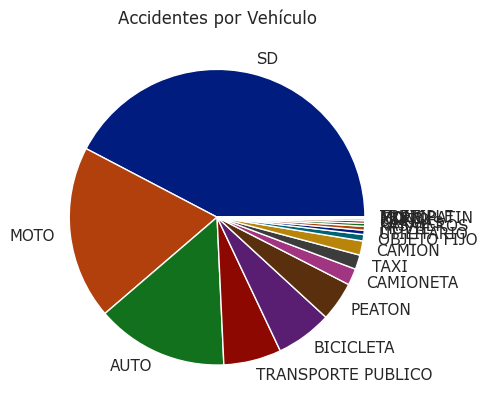

In [182]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid",palette='dark',font="Verdana",font_scale=1)
fig, ax = plt.subplots()
ax.pie(resultado, labels=resultado.keys())
plt.title('Accidentes por Vehículo')
plt.show()

Me voy a quedar con "MOTO", "AUTOMOVIL", "TRANSPORTE PUBLICO", "BICICLETA" y "PEATON".  
El resto de los vehículos los voy a asignar por similitud o los voy a dejar en "OTRO".

In [184]:
# Sumar CAMION, CARGAS Y PASAJEROS a TRANSPORTE PUBLICO por similitud de características
df_accidentes["vehiculo_1"].replace('CAMION', "TRANSPORTE PUBLICO", inplace=True)
df_accidentes["vehiculo_2"].replace('CAMION', "TRANSPORTE PUBLICO", inplace=True)
df_accidentes["vehiculo_1"].replace('CARGAS', "TRANSPORTE PUBLICO", inplace=True)
df_accidentes["vehiculo_2"].replace('CARGAS', "TRANSPORTE PUBLICO", inplace=True)
df_accidentes["vehiculo_1"].replace('PASAJEROS', "TRANSPORTE PUBLICO", inplace=True)
df_accidentes["vehiculo_2"].replace('PASAJEROS', "TRANSPORTE PUBLICO", inplace=True)

# Sumar TAXI, UTILITARIO, MOVIL y CAMIONETA a AUTO por similitud de características
df_accidentes["vehiculo_1"].replace('TAXI', "AUTOMOVIL", inplace=True)
df_accidentes["vehiculo_1"].replace('MOVIL', "AUTOMOVIL", inplace=True)
df_accidentes["vehiculo_1"].replace('UTILITARIO', "AUTOMOVIL", inplace=True)
df_accidentes["vehiculo_1"].replace('CAMIONETA', "AUTOMOVIL", inplace=True)
df_accidentes["vehiculo_1"].replace('AUTO', "AUTOMOVIL", inplace=True)
df_accidentes["vehiculo_2"].replace('TAXI', "AUTOMOVIL", inplace=True)
df_accidentes["vehiculo_2"].replace('MOVIL', "AUTOMOVIL", inplace=True)
df_accidentes["vehiculo_2"].replace('UTILITARIO', "AUTOMOVIL", inplace=True)
df_accidentes["vehiculo_2"].replace('CAMIONETA', "AUTOMOVIL", inplace=True)
df_accidentes["vehiculo_2"].replace('AUTO', "AUTOMOVIL", inplace=True)

# Sumar MONOPATIN a BICICLETA por similitud de características
df_accidentes["vehiculo_1"].replace('MONOPATIN', "BICICLETA", inplace=True)
df_accidentes["vehiculo_2"].replace('MONOPATIN', "BICICLETA", inplace=True)

# Sumar MIXTO, OBJETO FIJO, MULTIPLE Y TREN a OTRO por similitud de características
df_accidentes["vehiculo_1"].replace('MIXTO', "OTRO", inplace=True)
df_accidentes["vehiculo_2"].replace('OBJETO FIJO', "OTRO", inplace=True)
df_accidentes["vehiculo_2"].replace('MULTIPLE', "OTRO", inplace=True)
df_accidentes["vehiculo_2"].replace('TREN', "OTRO", inplace=True)

In [186]:
df_accidentes["vehiculo_1"].value_counts()

vehiculo_1
MOTO                  9433
SD                    7820
AUTOMOVIL             3462
BICICLETA             2780
PEATON                2423
TRANSPORTE PUBLICO    2258
OTRO                   139
Name: count, dtype: int64

In [187]:
df_accidentes["vehiculo_2"].value_counts()

vehiculo_2
SD                    16148
AUTOMOVIL              7139
TRANSPORTE PUBLICO     2529
MOTO                   1310
BICICLETA               725
OTRO                    448
PEATON                   16
Name: count, dtype: int64

Como observación, hay muchos más peatones y bicicletas en la columna de vehiculo_1, porque se originó a partir de la columna de víctima.

In [188]:
# Guardar el csv parcial
df_accidentes.to_csv("accidentes_parcial.csv", index=False)

# Sexo

In [ ]:
# Cargar el csv
df_accidentes = pd.read_csv("accidentes_parcial.csv")

In [189]:
df_accidentes["sexo"].value_counts()

sexo
Varon        16793
Mujer         8246
SD            1935
MASCULINO      545
sd             299
varon          224
FEMENINO       166
MUJER           62
mujer           44
Mujer            1
Name: count, dtype: int64

In [190]:
df_accidentes["sexo"].isna().sum()

0

In [191]:
df_accidentes["sexo"].describe()

count     28315
unique       10
top       Varon
freq      16793
Name: sexo, dtype: object

Tengo 17562 masculinos, 8519 femeninos y 2234 desconocidos. En este caso, ya que los desconocidos son menos del 10%, voy a dividir de manera sencilla los SD como masculinos y los sd como femeninos, y voy a unificar con la letra M y F las distintas strings.

In [192]:
valores_M = ["Varon", "SD", "MASCULINO", "varon"]
df_accidentes["sexo"].replace(valores_M, "M", inplace=True)

In [193]:
valores_F = ["Mujer", "sd", "FEMENINO", "MUJER", "mujer", "Mujer "]
df_accidentes["sexo"].replace(valores_F, "F", inplace=True)

In [194]:
df_accidentes["sexo"].value_counts()

sexo
M    19497
F     8818
Name: count, dtype: int64

In [195]:
# Guardar el csv parcial
df_accidentes.to_csv("accidentes_parcial.csv", index=False)

# Edad

In [310]:
# Cargar el csv
df_accidentes = pd.read_csv("accidentes_parcial.csv")

In [284]:
# Revisar la columna
df_accidentes["edad"].describe()

count     28315
unique      101
top          SD
freq       4043
Name: edad, dtype: object

In [285]:
# Revisar si hay nulos
df_accidentes["edad"].isna().sum()

0

In [286]:
# Buscar que valores hay además de las edades
df_accidentes["edad"].unique()

array(['19', '70', '30', '18', '29', '22', '16', '59', '65', '34', '41',
       '50', '38', '21', '52', '36', '20', '54', 'SD', '56', '24', '78',
       '79', '26', '57', '37', '58', '23', '60', '42', '53', '51', '40',
       '87', '76', '75', '35', '80', '43', '45', '67', '27', '55', '49',
       '81', '25', '33', '46', '83', '39', '28', '7', '48', '4', '82',
       '32', '17', '47', '61', '10', '95', '73', '84', '66', '85', '1',
       '15', '13', '77', '44', '31', '62', '74', '71', '11', '86', '69',
       '72', '12', '63', '92', '68', '91', '64', '5', '88', '3', '6', '9',
       '2', '90', '89', '97', '8', '14', '96', 'sd', '94', '100', '0',
       '93'], dtype=object)

Voy a cambiar los "sin datos" por nulos, para luego asignarles un valor de edad.

In [311]:
# Asignar nulos a los regitros "sin datos"
df_accidentes["edad"].replace("SD", np.NAN, inplace=True)
df_accidentes["edad"].replace("sd", np.NAN, inplace=True)

In [304]:
df_accidentes["edad"].isna().sum()

4524

#### Hice varias pruebas de imputación con librerías de machine learning sin lograr resultados satisfactorios, por lo que decidí hacer una imputación aleatoria en la franja de edades más frecuente.

In [295]:
df_accidentes["edad"].value_counts().head(30)

edad
28    832
29    829
27    796
30    793
26    776
25    755
31    740
23    726
32    723
24    710
34    674
33    671
22    633
35    626
37    591
38    554
39    550
36    545
40    513
21    511
41    497
43    493
42    465
44    450
45    399
20    389
47    376
46    370
49    326
19    320
Name: count, dtype: int64

In [312]:
# Voy a asignar los nulos a las edades entre 19 y 50 años
edades_aleatorias = np.random.randint(19, 50, df_accidentes["edad"].isna().sum())
df_accidentes.loc[df_accidentes['edad'].isnull(), 'edad'] = edades_aleatorias

In [313]:
# Convertir las edades a entero
df_accidentes['edad'] = df_accidentes['edad'].astype(int)

In [314]:
# Verificar que no quedaron nulos y contar valores
print(df_accidentes["edad"].isna().sum())
df_accidentes["edad"].value_counts()

0


edad
28     976
29     972
30     948
27     927
25     922
      ... 
93       3
0        2
97       1
96       1
100      1
Name: count, Length: 99, dtype: int64

In [315]:
# Revisar las estadísticas
df_accidentes["edad"].describe()

count    28315.000000
mean        37.242628
std         14.617896
min          0.000000
25%         27.000000
50%         34.000000
75%         45.000000
max        100.000000
Name: edad, dtype: float64

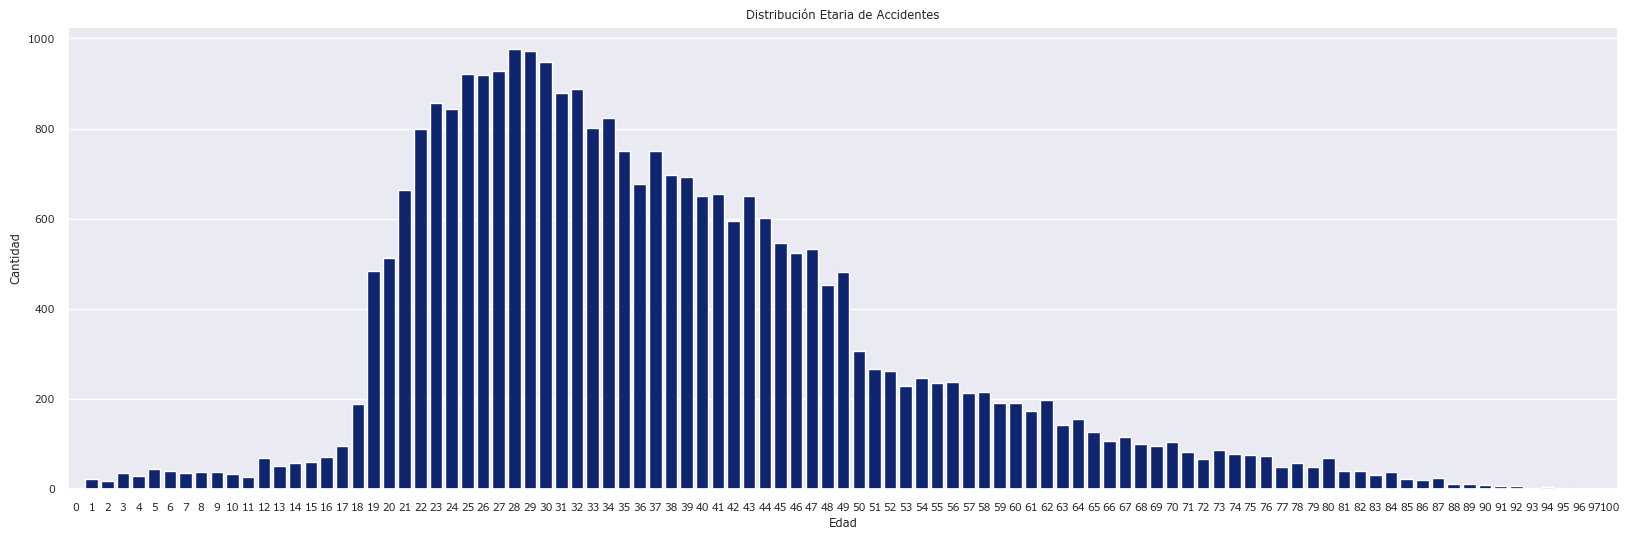

In [316]:
plt.figure(figsize=(20,6))
sns.set_theme(style="darkgrid",palette='dark',font="Verdana",font_scale=.7)
sns.barplot(x=df_accidentes["edad"].value_counts().index,y=df_accidentes["edad"].value_counts())
plt.title('Distribución Etaria de Accidentes')
plt.xlabel('Edad')
plt.ylabel("Cantidad")
plt.show()

#### Lógicamente hay un aumento en la franja elegida, pero es el mejor de los resultados al que he llegado con las diferentes pruebas.

In [317]:
# Guardar el csv parcial
df_accidentes.to_csv("accidentes_parcial.csv", index=False)

# Gravedad

In [2]:
# Cargar el csv
df_accidentes = pd.read_csv("accidentes_parcial.csv")

In [318]:
# Revisar los valores
df_accidentes["gravedad"].value_counts()

gravedad
SD                     26759
GRAVE                    808
sd                        95
2017-01-16 00:00:00        3
2020-12-25 00:00:00        3
                       ...  
2018-01-26 00:00:00        1
2018-01-19 00:00:00        1
2018-01-18 00:00:00        1
2018-01-14 00:00:00        1
2018-10-14 00:00:00        1
Name: count, Length: 567, dtype: int64

#### Todos los valores con fecha son muertes. La fecha viene de la fecha de fallecimiento de cuando uní los datasets.

In [319]:
# Revisar el formato de las fechas
type(df_accidentes["gravedad"].value_counts().index[3])

str

In [320]:
# Revisar los valores
df_accidentes["gravedad"].unique()

array(['2016-01-01 00:00:00', '2016-01-02 00:00:00',
       '2016-01-03 00:00:00', 'SD', '2016-02-01 00:00:00',
       '2016-01-24 00:00:00', '2016-01-26 00:00:00',
       '2016-01-29 00:00:00', '2016-02-08 00:00:00',
       '2016-02-10 00:00:00', '2016-02-14 00:00:00',
       '2016-02-16 00:00:00', '2016-02-17 00:00:00',
       '2016-03-02 00:00:00', '2016-02-28 00:00:00',
       '2016-03-04 00:00:00', '2016-03-12 00:00:00',
       '2016-03-13 00:00:00', '2016-03-14 00:00:00',
       '2016-03-19 00:00:00', '2016-03-21 00:00:00',
       '2016-03-23 00:00:00', '2016-03-29 00:00:00',
       '2016-03-30 00:00:00', '2016-03-31 00:00:00',
       '2016-04-15 00:00:00', '2016-04-19 00:00:00',
       '2016-04-20 00:00:00', '2016-04-22 00:00:00',
       '2016-04-25 00:00:00', '2016-04-28 00:00:00',
       '2016-04-26 00:00:00', '2016-05-08 00:00:00',
       '2016-05-26 00:00:00', '2016-05-20 00:00:00',
       '2016-05-23 00:00:00', '2016-06-12 00:00:00',
       '2016-06-13 00:00:00', '2016-07-0

In [321]:
# Transformar todas las fecha en fatal
df_accidentes.loc[df_accidentes["gravedad"].str.startswith("2"), "gravedad"] = "FATAL"

In [322]:
df_accidentes["gravedad"].value_counts()

gravedad
SD       26759
GRAVE      808
FATAL      651
sd          95
grave        2
Name: count, dtype: int64

In [323]:
# Terminar de unificar los valores
df_accidentes["gravedad"].replace("SD", "LEVE - SIN LESIONES", inplace=True)
df_accidentes["gravedad"].replace("sd", "LEVE - SIN LESIONES", inplace=True)
df_accidentes["gravedad"].replace("grave", "GRAVE", inplace=True)

In [324]:
df_accidentes["gravedad"].value_counts()

gravedad
LEVE - SIN LESIONES    26854
GRAVE                    810
FATAL                    651
Name: count, dtype: int64

In [325]:
# Guardar el csv de la segunda etapa
df_accidentes.to_csv("accidentes_2.csv", index=False)

## Por último voy a reordenar las columnas

In [326]:
# Cargar el csv
df = pd.read_csv("accidentes_2.csv")
df.head()

,id,fecha,franja_hora,tipo_calle,direccion_normalizada,comuna,longitud,latitud,vehiculo_2,vehiculo_1,sexo,edad,gravedad
0,2016-0001,2016-01-01,4,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.47533969,-34.68757022,AUTOMOVIL,MOTO,M,19,FATAL
1,2016-0002,2016-01-02,1,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.50877521,-34.66977709,TRANSPORTE PUBLICO,AUTOMOVIL,M,70,FATAL
2,2016-0003,2016-01-03,7,AVENIDA,ENTRE RIOS AV. 2034,1,-58.39040293,-34.63189362,AUTOMOVIL,MOTO,M,30,FATAL
3,2016-0004,2016-01-10,0,AVENIDA,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.46503904,-34.68092974,SD,MOTO,M,18,LEVE - SIN LESIONES
4,2016-0005,2016-01-21,5,AVENIDA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.38718297,-34.62246630,TRANSPORTE PUBLICO,MOTO,M,29,FATAL


In [327]:
df.columns

Index(['id', 'fecha', 'franja_hora', 'tipo_calle', 'direccion_normalizada',
       'comuna', 'longitud', 'latitud', 'vehiculo_2', 'vehiculo_1', 'sexo',
       'edad', 'gravedad'],
      dtype='object')

In [328]:
df = df[["id", "fecha", "franja_hora", "gravedad", "sexo", "edad", "vehiculo_1", "vehiculo_2", "direccion_normalizada", "tipo_calle", "comuna", "latitud", "longitud"]]

In [329]:
df.head()

,id,fecha,franja_hora,gravedad,sexo,edad,vehiculo_1,vehiculo_2,direccion_normalizada,tipo_calle,comuna,latitud,longitud
0,2016-0001,2016-01-01,4,FATAL,M,19,MOTO,AUTOMOVIL,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",AVENIDA,8,-34.68757022,-58.47533969
1,2016-0002,2016-01-02,1,FATAL,M,70,AUTOMOVIL,TRANSPORTE PUBLICO,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",GRAL PAZ,9,-34.66977709,-58.50877521
2,2016-0003,2016-01-03,7,FATAL,M,30,MOTO,AUTOMOVIL,ENTRE RIOS AV. 2034,AVENIDA,1,-34.63189362,-58.39040293
3,2016-0004,2016-01-10,0,LEVE - SIN LESIONES,M,18,MOTO,SD,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",AVENIDA,8,-34.68092974,-58.46503904
4,2016-0005,2016-01-21,5,FATAL,M,29,MOTO,TRANSPORTE PUBLICO,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",AVENIDA,1,-34.62246630,-58.38718297


In [330]:
# Guardar el csv de la segunda etapa
df.to_csv("accidentes_2.csv", index=False)

In [331]:
# Cargar el csv
df = pd.read_csv("accidentes_2.csv")
df.head()

,id,fecha,franja_hora,gravedad,sexo,edad,vehiculo_1,vehiculo_2,direccion_normalizada,tipo_calle,comuna,latitud,longitud
0,2016-0001,2016-01-01,4,FATAL,M,19,MOTO,AUTOMOVIL,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",AVENIDA,8,-34.68757022,-58.47533969
1,2016-0002,2016-01-02,1,FATAL,M,70,AUTOMOVIL,TRANSPORTE PUBLICO,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",GRAL PAZ,9,-34.66977709,-58.50877521
2,2016-0003,2016-01-03,7,FATAL,M,30,MOTO,AUTOMOVIL,ENTRE RIOS AV. 2034,AVENIDA,1,-34.63189362,-58.39040293
3,2016-0004,2016-01-10,0,LEVE - SIN LESIONES,M,18,MOTO,SD,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",AVENIDA,8,-34.68092974,-58.46503904
4,2016-0005,2016-01-21,5,FATAL,M,29,MOTO,TRANSPORTE PUBLICO,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",AVENIDA,1,-34.62246630,-58.38718297
